Wskaźnik newsów - CD PROJEKT
============================

Notowanie
---------------

In [1]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('CDPROJEKT','20190520','20190525')    
                       

Analiza Twittów
----------------------

In [3]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp.KeyWords= { 'CDPROJEKT':{
                    'search': ['CD Projekt'],
                    'ignore':['sponsor'],
                    'sentiment':{
                        'kuluary':-1,
                        'lepsza':1,
                        'otwierać':1,
                        'najlepszy':1,
                        'startować':1,
                        'róść':1,
                        'perełka':1
                        }
                    }
               }

twt =  twp.indicator('CDPROJEKT','20190520','20190525')
twt_f = list(filter(lambda x: not x.ignore and x.power>100000 and x.sentiment==0 ,twt))
twt_f.sort(key=lambda x: x.power, reverse=True)
for t in twt_f:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)


430622 [] 2019-05-22 19:00:52
-------------------------------------------------------------------------
Nie tylko gracze czekają na „Cyberpunk 2077”. Inwestorzy wierzą w CD Projekt https://t.co/oPcfoXaem8
-------------------------------------------------------------------------
nie Tylka gracz czekać na „Cyberpunk 2077 ” . inwestor wierzyć W cd projekt https : //t.co/oPcfoXaem8 


Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

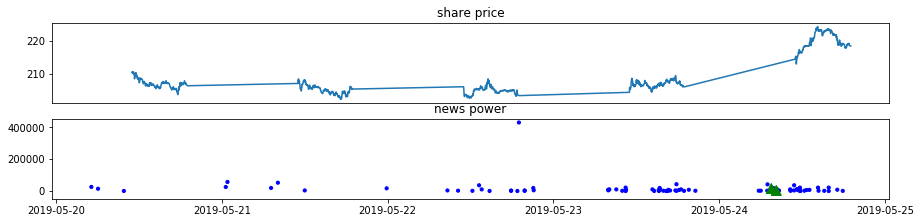

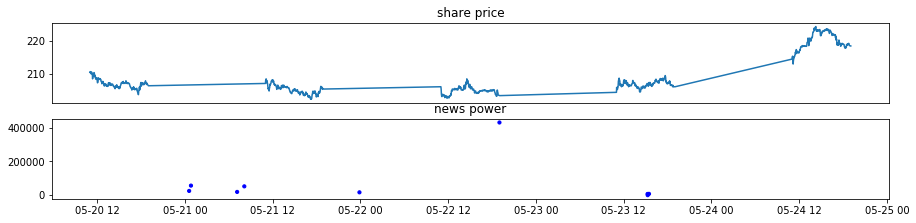

962 [] 2019-05-24 17:54:12 Stanley
-------------------------------------------------------------------------
@DreamLorenc Brałem udział w poprzedniej edycji. Inwestowało się własne pieniądze 10000 zł.Główną nagrodą był Passat CC za grubo ponad 100 tys.Kupiłem CD Projekt za wszystko i zająłem odległe miejsce.Sprzedałem po 4,5 zł. Dziś za ten pakiet kupiłbym takie 3 nowe auta. Dało mi to do myślenia.
8218 [] 2019-05-24 17:06:36 wnp.pl
-------------------------------------------------------------------------
Główne indeksy zwyżkowały. W gronie blue chipów najsilniej poszły w górę CD Projekt, KGHM i JSW https://t.co/a71LUNun82
0 [] 2019-05-24 15:52:00 Pap
-------------------------------------------------------------------------
DZIEŃ NA GPW: Wzrosty indeksów; CD Projekt na historycznych maksimach
http://pre-biznes.pap/NSE/pl/news/all/info/2506363,dzien-na-gpw:-wzrosty-indeksow--cd-projekt-na-historycznych-maksimach
21531 [] 2019-05-24 15:52:00 PAP Biznes
-----------------------------------

In [5]:
import plot_helper 
twt_w = twt #list(filter(lambda x: not x.ignore and x.power>100000 and x.sentiment!=0 ,twt))
plot_helper.plot2(data,twt_w)

twt_w2 = list(filter(lambda x: 'Cyberpunk 2077' in x.text,twt))
plot_helper.plot2(data,twt_w2)



for t in twt:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)